# Cálculo de la duración de un proyecto usando el Método de Montecarlo

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib notebook

### Introducción de datos del proyecto

In [7]:
duration_distribution_parameters = pd.DataFrame(data={'A': [10, 1.5],
                                                      'B': [ 5, 0.4],
                                                      'C': [ 6, 0.8],
                                                      'D': [ 2, 0.7],
                                                      'E': [ 7, 1.8],
                                                      'F': [ 8, 0.8],
                                                      'G': [ 4, 1.4],
                                                      'H': [ 7, 1.6],
                                                      'f1':[ 0, 0.0],
                                                      'f2':[ 0, 0.0],
                                                     },
                                                index=['mean', 'stdev']  )
activity_names = duration_distribution_parameters.columns

In [8]:
duration_distribution_parameters

,A,B,C,D,E,F,G,H,f1,f2
mean,10.0,5.0,6.0,2.0,7.0,8.0,4.0,7.0,0.0,0.0
stdev,1.5,0.4,0.8,0.7,1.8,0.8,1.4,1.6,0.0,0.0


### Generación aleatoria de las duraciones de las actividades

In [4]:
number_of_samples = 1000

In [5]:

duration = pd.DataFrame([np.random.normal(size = number_of_samples,
                                          loc  = duration_distribution_parameters.loc['mean', task],
                                          scale= duration_distribution_parameters.loc['stdev',task])
                         for task in activity_names
                        ],
                        index=activity_names).T

In [6]:
duration.head()

,A,B,C,D,E,F,G,H,f1,f2
0,10.205370,4.803552,6.370438,3.059848,9.118668,7.623929,6.027058,9.089030,0.0,0.0
1,10.303301,5.064229,6.267314,2.178971,5.504975,6.757039,3.947664,6.011022,0.0,0.0
2,8.972670,5.091342,6.774933,0.858339,9.780503,9.796775,2.952185,6.167954,0.0,0.0
3,9.202183,5.557490,6.298898,3.344813,6.279872,8.526133,4.861320,6.366079,0.0,0.0
4,10.921896,5.112551,5.886120,1.825548,6.483340,7.330304,6.831225,7.378983,0.0,0.0


### Cálculo de los tiempos tempranos

In [7]:
t_early = pd.DataFrame()
t_early['nodo_0'] = np.zeros(number_of_samples)
t_early['nodo_1'] = t_early['nodo_0'] + duration['A'] 
t_early['nodo_2'] = t_early['nodo_0'] + duration['B']
t_early['nodo_3'] = pd.DataFrame( { 'input_D':  t_early['nodo_1'] + duration['D'] ,
                                    'input_f2': t_early['nodo_2'] + duration['f2']
                                  }).max(axis=1)
t_early['nodo_4'] = pd.DataFrame( { 'input_C':  t_early['nodo_1'] + duration['C'] ,
                                    'input_f1': t_early['nodo_3'] + duration['f1']
                                  }).max(axis=1)
t_early['nodo_5'] = pd.DataFrame( { 'input_E': t_early['nodo_4'] + duration['E'] ,
                                    'input_F': t_early['nodo_3'] + duration['F']
                                  }).max(axis=1)
t_early['nodo_6'] = pd.DataFrame( { 'input_G': t_early['nodo_5'] + duration['G'] ,
                                    'input_H': t_early['nodo_2'] + duration['H']
                                  }).max(axis=1)

In [8]:
t_early.head()

,nodo_0,nodo_1,nodo_2,nodo_3,nodo_4,nodo_5,nodo_6
0,0.0,10.205370,4.803552,13.265218,16.575808,25.694476,31.721534
1,0.0,10.303301,5.064229,12.482273,16.570616,22.075591,26.023255
2,0.0,8.972670,5.091342,9.831009,15.747603,25.528106,28.480290
3,0.0,9.202183,5.557490,12.546996,15.501080,21.780953,26.642272
4,0.0,10.921896,5.112551,12.747444,16.808017,23.291356,30.122582


### Visualización y caracterización de la distribución de la duración del proyecto 

<IPython.core.display.Javascript object>


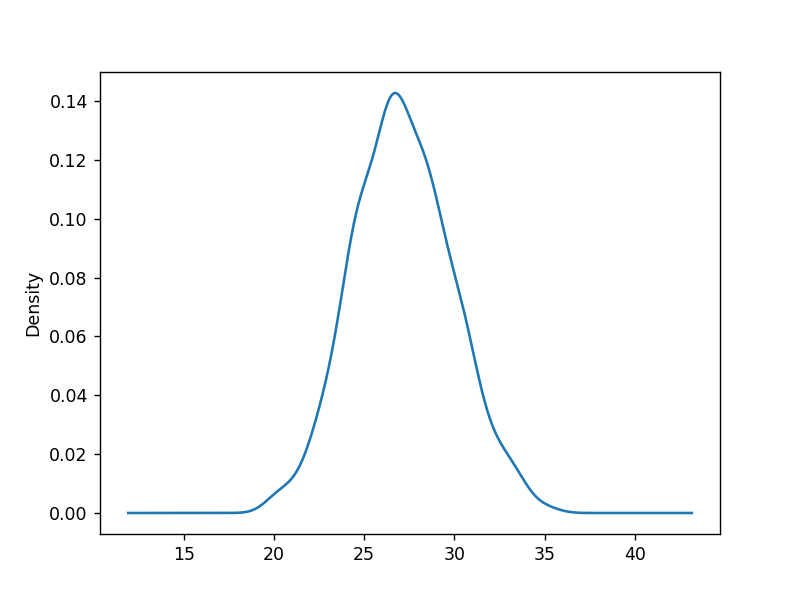

In [9]:
t_early['nodo_6'].plot(kind='density')

In [10]:
t_early['nodo_6'].describe()

count    1000.000000
mean       27.130726
std         2.742773
min        19.732842
25%        25.157846
50%        27.030578
75%        28.964329
max        35.349063
Name: nodo_6, dtype: float64